# Perceptron Example with PyTorch

In [19]:
import torch
import matplotlib.pyplot as plt
import numpy as np

## generate data

为了方便可视化，特征向量为2维。假设分类超平面为$2x_1-x_2+3 = 0$. 使用红色标记正样本，使用绿色标记负样本。

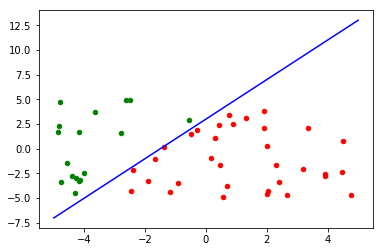

In [111]:
N = 50   # dataset size
features = (torch.rand((N, 2)) - 0.5) * 10
labels = (features[:,0] * 2 - features[:,1] + 3 > 0).float()
labels[labels == 0] = -1

# 筛选正样本
positive_fea = features[(labels>0).nonzero().squeeze()].numpy()
plt.scatter(positive_fea[:,0], positive_fea[:,1], 20, 'r')

# 负样本
negtive_fea = features[(labels<0).nonzero().squeeze()].numpy()
plt.scatter(negtive_fea[:,0], negtive_fea[:,1], 20, 'g')
# 分类超平面，蓝色
x1 = np.linspace(-5, 5, 100)
x2 = 2*x1+3
plt.plot(x1, x2, 'b-')
plt.show()

## 训练

感知机模型的判别函数如下所示：
$$y = \text{sign}(Wx+b)$$
其中，
$$\text{sign}(x) = \begin{cases} 1, & x > 0\\ -1, &\text{otherwise}\end{cases}$$

loss被定义为被错误分类的点到分类超平面的函数间隔距离，即：
$$L = -\sum_{i=1}^{N}I(y_i!=\hat{y_i})y_i(Wx+b)$$

其中，$I(x)$是指示函数。而$Wx+b$则是计算点到超平面的距离。我们知道，点到平面的距离计算公式为
$$d = \frac{|Wx+b|}{\Vert W\Vert}$$

这里把分母去掉，因为我们不考虑$\Vert W\Vert$的放缩作用的影响。（在这里，很多网上的文章都说这一项是个常数，所以可以去掉，我觉得这种方法不对。这里之所以引入了这种损失函数，是将一个不连续的判别函数搞成了连续的loss，方便求导SGD。其实我们的最终目的是将所有的点正确分类，至于这些点与超平面的距离，我们不是很关系，所以，这里可以省去这项分母）

同时，我们乘上了一个$-y_i$，这一项是为了去掉上述距离计算公式中的绝对值符号的。

有了上面的约定，我们接下来求导即可。
下面的公式，我们默认使用SGD，只考虑单个训练样本，不再考虑整个训练集，将loss函数中外层的累加符号就去掉了。
对参数$W$求导，有
$$\frac{\partial L}{\partial W} = -y_k x_k$$
对参数$b$求导，有
$$\frac{\partial L}{\partial b} = -y_k$$
其中，$(x_k,y_k)$即为当前被错分的样本。

iter 0: err count = 18
iter 1: err count = 19
iter 2: err count = 9
iter 3: err count = 7
iter 4: err count = 5
iter 5: err count = 2
iter 6: err count = 1
iter 7: err count = 0
W: 
 2.6034
-1.3352
[torch.FloatTensor of size 2]

b: 
 4.0262
[torch.FloatTensor of size 1]



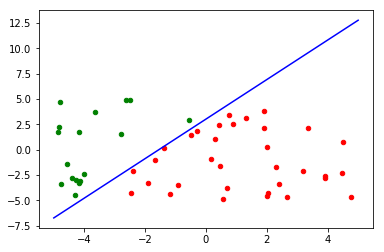

In [117]:
lr = 0.1
W = torch.rand(2)
b = torch.rand(1)
# 最多迭代20次
for i in xrange(20):
    score = features.mm(W.unsqueeze(1)).squeeze()
    score += b.expand_as(score)   # torch没有broadcasting机制
    pred = (score > 0).float()
    pred[pred == 0] = -1
    err_index = (pred != labels).nonzero().squeeze()
    err_cnt = err_index.numel()
    print 'iter {}: err count = {}'.format(i, err_cnt)
    if err_cnt == 0:
        break
    x = features[err_index]
    y = labels[err_index]
    delta_W = torch.sum(x * (y.unsqueeze(1).expand_as(x)), 0)
    delta_b = torch.sum(y)
    # 参数更新
    W += lr * delta_W
    b += lr * delta_b
print 'W: {}'.format(W)
print 'b: {}'.format(b)

plt.figure()
plt.scatter(positive_fea[:,0], positive_fea[:,1], 20, 'r')
plt.scatter(negtive_fea[:,0], negtive_fea[:,1], 20, 'g')
x1 = np.linspace(-5, 5, 100)
x2 = -W[0]/W[1]*x1-b[0]/W[1]
plt.plot(x1, x2, 'b-')
plt.show()